<a href="https://colab.research.google.com/github/hany019/MULTI-CRITERIA-Task2/blob/main/Copy_of_Task2_OWA_virtual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MCDSS - MESIIA virtual group.    URV
# **TASK 2. Aggregation operators for numerical data**

The goal of this session is to practise with two simple methods of aggregation: WSM (Weighted Sum Model) that is equivalent to weighted average and afterwards the OWA operator (Ordered Weighted Average).
The exercise will also enable you to the use of Python notebooks and with *mcda library* using Python programming tools.

This exercise is part of the evaluation of the course.

**You must write a report on this exercise and upload it at Moodle before the indicated deadline. You must submit a PDF file that includes the results of each task indicated below. In addition to the results, you must add clear and detailed explanations about the results, including the observations and conclusions at each question.**

The decision problem we will consider is the selection of the best restaurant for a certain decision maker. We will consider different restaurants in Tarragona and 5 criteria.

The first thing we should do is installing the MCDA package. To do that, we use the `pip` command. Run the cell and test if everything went correctly. Take a look to the MCDA package documentation to know how to use it properly. [Documentation](https://py-mcda.readthedocs.io/en/stable/index.html) and [Examples](https://gitlab.com/decide.imt-atlantique/pymcda/-/tree/v0.4.0/examples)

We will use version `0.4.0`.

In [2]:
!pip install mcda==0.4.0

## Task 1: **Weighted Average or Weighted Sum**

**1**. The input data of this MCDA methods is: a list of alternatives, a list of criteria and the weights of the criteria. In this model, weights represent the relative importance of each criterion. The sum of the weights must be 1 unit.

In [3]:
import mcda
import pandas as pd
from mcda.core.performance_table import *
from mcda.core.scales import *
from mcda.plot import *

alternatives = ["Caleta", "Tarakon", "Dominos", "Ancora", "Frida", "Cucafera"]

criteria = {
    "Food": 0.35,
    "Service": 0.35,
    "Atmosphere": 0.1,
    "Category": 0.1,
    "Location": 0.1
}
criteria

{'Food': 0.35,
 'Service': 0.35,
 'Atmosphere': 0.1,
 'Category': 0.1,
 'Location': 0.1}

*2*. Here you have the performance table. Each row corresponds to one of the restaurants (alternatives) and each column contains the utility scores for the set of criteria. The range of the utility is 0..1 and all criteria are maximized.

In [4]:
performance_table = PerformanceTable(
    [[0.7, 0.9, 0.9, 0.7, 0.0],
     [0.5, 0.7, 0.2, 0.8, 0.5],
     [0.4, 0.3, 0.1, 0.2, 0.1],
     [1.0, 0.4, 0.7, 0.7, 0.4],
     [0.8, 0.7, 0.5, 1.0, 0.1],
     [0.2, 0.4, 0.9, 0.8, 0.9]],
    alternatives = alternatives,
    criteria = criteria.keys())

performance_table.df

,Food,Service,Atmosphere,Category,Location
Caleta,0.7,0.9,0.9,0.7,0.0
Tarakon,0.5,0.7,0.2,0.8,0.5
Dominos,0.4,0.3,0.1,0.2,0.1
Ancora,1.0,0.4,0.7,0.7,0.4
Frida,0.8,0.7,0.5,1.0,0.1
Cucafera,0.2,0.4,0.9,0.8,0.9




```
# This is formatted as code
```

We may represent the alternatives and their scores by means of radar projections, which is a very visual representation.

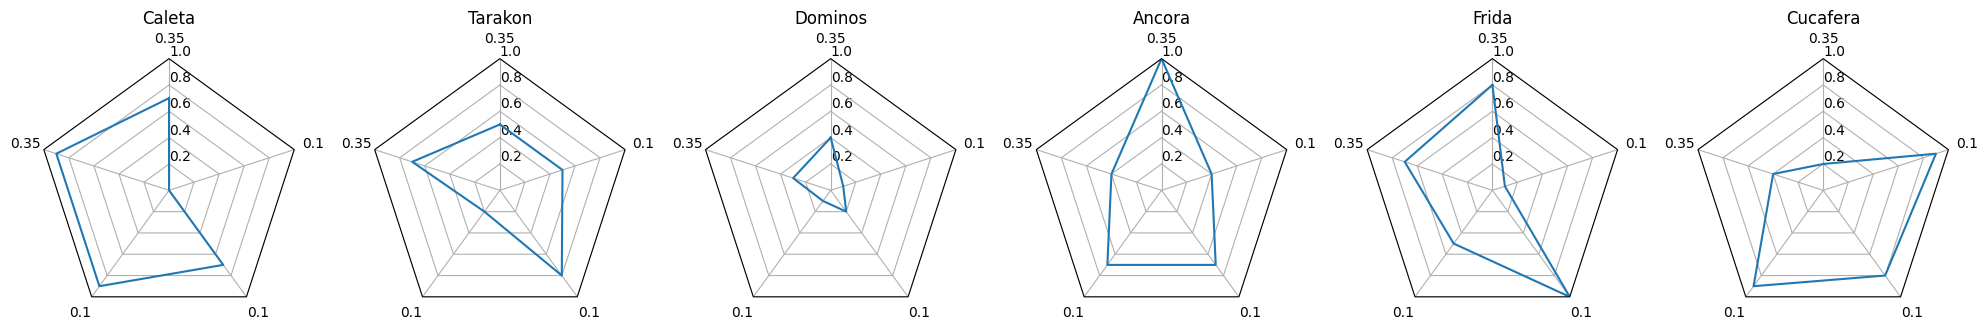

In [5]:
create_radar_projection(len(criteria), frame='polygon')

fig = Figure(ncols=6, figsize=(20, 20))

for alternative in alternatives:
    values = performance_table.get_alternative_values(alternative)
    ax = fig.create_add_axis(projection = radar_projection_name(len(criteria.values())))
    ax.title = alternative
    ax.add_plot(
        RadarPlot(
            criteria.values(),
            values.data,
            rlimits = [0,1]
        )
    )

fig.draw()

*3*. Now we want to apply the WSM aggregation. First, we will multiply the utilities and the corresponding weight.

In [6]:
weighted_table = performance_table.apply_criteria_weights(criteria)

weighted_table.df

,Food,Service,Atmosphere,Category,Location
Caleta,0.245,0.315,0.09,0.07,0.00
Tarakon,0.175,0.245,0.02,0.08,0.05
Dominos,0.140,0.105,0.01,0.02,0.01
Ancora,0.350,0.140,0.07,0.07,0.04
Frida,0.280,0.245,0.05,0.10,0.01
Cucafera,0.070,0.140,0.09,0.08,0.09


*4*. Secondly, we sum up all the alternatives to obtain an overall score on each one.

In [7]:
utilitiesWM = weighted_table.sum(axis=1)
utilitiesWM

Caleta      0.720
Tarakon     0.570
Dominos     0.285
Ancora      0.670
Frida       0.685
Cucafera    0.470
dtype: float64

*5*. Once we have obtained the weighed table, let's plot it to see visually which alternative is the best according to the specified criteria weights.

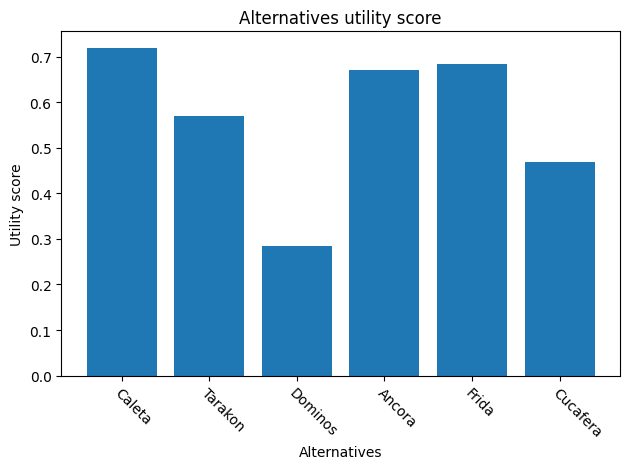

In [8]:
x = [*range(len(alternatives))]

plot = BarPlot(
    x, utilitiesWM, xticks=x,
    xticklabels = alternatives, xticklabels_tilted = True
)
plot.draw()
plot.axis.title = "Alternatives utility score"
plot.axis.xlabel = "Alternatives"
plot.axis.ylabel = "Utility score"
plot.axis.figure.draw()

* According to this plot, which alternative do you think is the best? Why?*

# Answer

The restaurant named "Caleta" has the highest utility score, indicated by the tallest bar in the chart. This suggests that according to the Weighted Sum Model (WSM), taking into account the criteria and their respective weights, "Caleta" has performed best overall.
The utility scores are a result of the aggregation of the criteria evaluations multiplied by their weights. Since "Caleta" has the highest aggregated score, it is considered the best option among the alternatives presented.

Notice that in this representation you can discard visually which are the worst alternatives.*

## Task 2: **Add new alternatives**

6. Modify the dataset including two new alternatives with the following characteristics:
- A restaurant that has the worst evaluations in all the criteria except in Service.
- A restaurant that has the worst evaluations in all the criteria except in Location.

Apply again the WSM and study the results achieved for these new restaurants in comparison with the rest of restaurants. Take into account that you must modify also the *alternatives* array.

In [ ]:
# Alternatives names
new_alternatives = []
# Alternatives scores for each criterion
alternatives_values = {
    "Food": [],
    "Service": [],
    "Atmosphere": [],
    "Category": [],
    "Location": []
}

Now, modify the performance table by adding the utilities

1.   List item
2.   List item

as indicated. You can also represent them in radar (spider) graphics if you want.

In [ ]:
all_alternatives = alternatives + new_alternatives

performance_table.df = pd.concat([
    performance_table.df,
    pd.DataFrame(alternatives_values, index = new_alternatives)],
    axis = 0)
performance_table.df

,Food,Service,Atmosphere,Category,Location
Caleta,0.7,0.9,0.9,0.7,0.0
Tarakon,0.5,0.7,0.2,0.8,0.5
Dominos,0.4,0.3,0.1,0.2,0.1
Ancora,1.0,0.4,0.7,0.7,0.4
Frida,0.8,0.7,0.5,1.0,0.1
Cucafera,0.2,0.4,0.9,0.8,0.9


Repeat the steps of the first part of the exercise to

*   List item
*   List item

calculate the Weigthed Average and plot the results.

In [ ]:
utilitiesAA = weighted_table.sum(axis=1)

An additional option is to rank the alternatives according tot he scores. The following function makes this ordering.

In [ ]:
utilitiesAA_sorted = utilitiesAA.sort_values(ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Caleta      0.720
Frida       0.685
Ancora      0.670
Tarakon     0.570
Cucafera    0.470
Dominos     0.285
dtype: float64


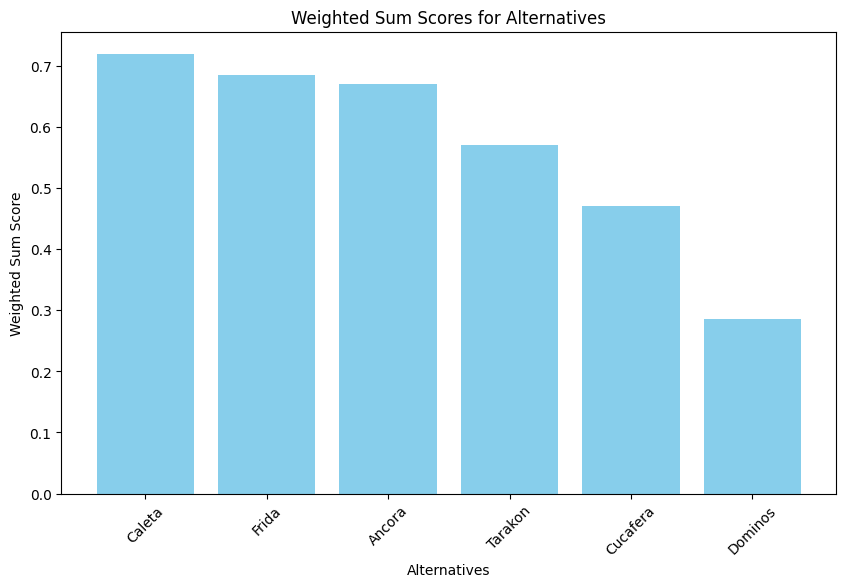

In [ ]:
print(utilitiesAA_sorted)
plt.figure(figsize=(10, 6))
plt.bar(utilitiesAA_sorted.index, utilitiesAA_sorted.values, color='skyblue')
plt.xlabel('Alternatives')
plt.ylabel('Weighted Sum Score')
plt.title('Weighted Sum Scores for Alternatives')
plt.xticks(rotation=45)
plt.show()

(1) Adding New Alternatives: Two new restaurant alternatives were added to the dataset

(2) Modifying the Performance Table: The utilities (performance scores) for these new alternatives were added to the existing performance table. This was done by concatenating the new scores to the existing DataFrame.

(3) Applying WSM: The WSM was then reapplied to this updated dataset to calculate the overall utility score for each restaurant, which is done by summing up the product of each criterion's score and its corresponding weight.

(4) Plotting Results: The overall utility scores were plotted in a bar chart to visually compare the performance of each alternative.

(5) Analysis: From the bar chart, you can observe how each alternative ranks based on its utility score after the inclusion of the two new alternatives. The bar chart should reveal:

(6) Conclusions: After reevaluating with the new data, conclusions can be drawn about which restaurant is now considered the best based on the WSM. This would be the one with the highest bar (utility score) in the bar chart.

# Expalin from chart

In the Weighted Sum Model, the alternative with the highest sum — which in this case is "Caleta" — is considered the best option. This suggests that "Caleta" has performed best across the weighted criteria, or has the best combination of attributes valued by the decision criteria, making it the most suitable choice among the options evaluated.

## Task 3: **arithmetic non-weighted average**

In this part, you will execute a

*   List item
*   List item

non-weighted **Arithmetic average**. Thus, it is necessary to modify the criteria weights by establishing the same weights for all criteria.

In [ ]:
criteria = {
    "Food": 1,
    "Service": 1,
    "Atmosphere": 1,
    "Category": 1,
    "Location": 1
    }

Now, follow the same steps as in part one to calculate the Weigthed Average and plot the results.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


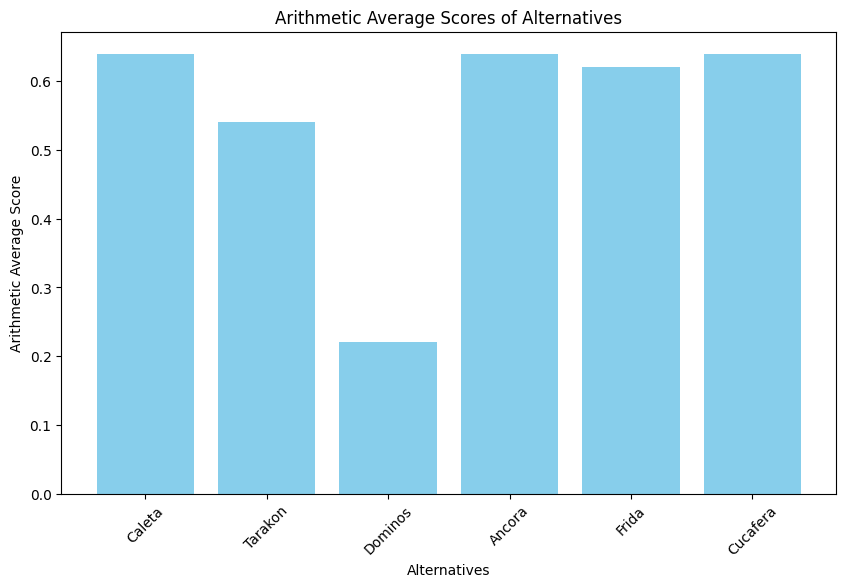

In [ ]:
# 2. Calculate the Non-Weighted Arithmetic Average for each alternative
# Since I want the non-weighted average, I can simply use the mean method without applying weights
arithmetic_averages = performance_table.df.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.bar(arithmetic_averages.index, arithmetic_averages, color='skyblue')
plt.xlabel('Alternatives')
plt.ylabel('Arithmetic Average Score')
plt.title('Arithmetic Average Scores of Alternatives')
plt.xticks(rotation=45)  # To make the alternative labels readable
plt.show()

# In Task 3
 This approach treats all criteria as equally important by assigning them the same weight. Here's an explanation and analysis of the results depicted in the bar chart

# Objective:
To evaluate the restaurant alternatives without giving any special emphasis to particular criteria, providing an equal-weight assessment.

# Methodology:
Each criterion was assigned an equal weight of 1. This method of averaging does not prioritize any specific aspect of the restaurants but instead treats them all with equal importance. The arithmetic average for each restaurant was computed by taking the mean of their scores across all criteria.

# Results:
The arithmetic average scores for each restaurant are presented in the bar chart. From the tallest to the shortest bar, they indicate the following scores:

Caleta: Approximately 0.65
Tarakon: Around 0.5
Dominos: Close to 0.2
Ancora: Approximately 0.65
Frida: Around 0.65
Cucafera: Slightly over 0.5
Analysis:
The chart shows that three restaurants, Caleta, Ancora, and Frida, have similar top arithmetic average scores, significantly higher than the other alternatives. Dominos scores the lowest, indicating a consistent underperformance across all evaluated criteria.

## Task 4: **OWA operator**

Now we will study the Ordered Weighted Average, with the same case study.
First we must import the functions about OWA from the package.

In [ ]:
from mcda.mavt.aggregators import *
from mcda.core.scales import *


7. Rember that OWA does not give weights to criteria, so we assume all criteria have the same importance. We have now to define a set of weights that establish the aggregation policy (from a conjunctive to a disjunctive model).
The weights will be applied to the values after reordering them decreasingly.

You have here a set of weights to use as a first example. Can you say which is the aggregation policy?

In [ ]:
weightsOWA =  [0, 0.3, 0.4, 0.3, 0.0]
weightsOWA

[0, 0.3, 0.4, 0.3, 0.0]

In [ ]:
owa = OWA(weightsOWA)
utilitiesOWA = owa(performance_table)
utilitiesOWA

Caleta      0.76
Tarakon     0.56
Dominos     0.20
Ancora      0.61
Frida       0.67
Cucafera    0.71
dtype: float64

8. You should  also represent the scores obtained with the bar plot to facilitate the visualization.

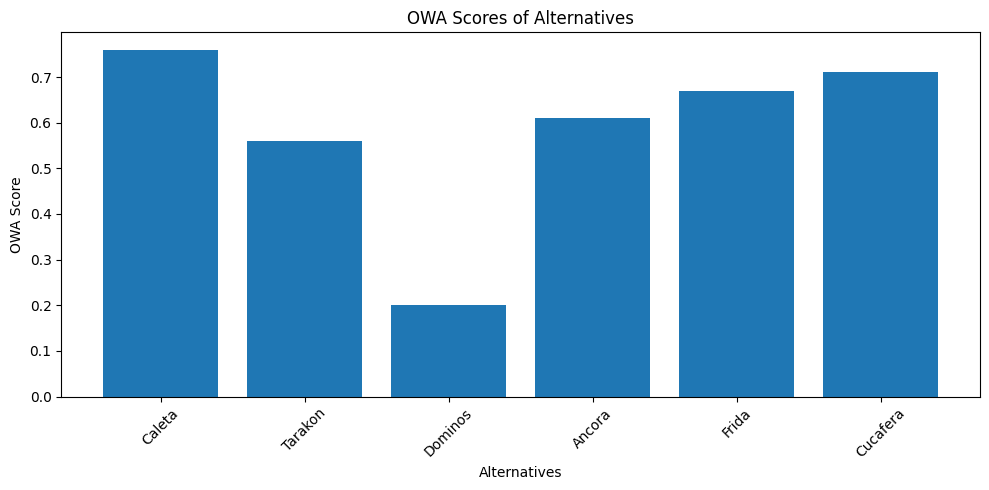

In [ ]:
# Assume utilitiesOWA is a Pandas Series
plt.figure(figsize=(10, 5))  # You can adjust the figure size to your preference
plt.bar(utilitiesOWA.index, utilitiesOWA.values)
plt.xlabel('Alternatives')
plt.ylabel('OWA Score')
plt.title('OWA Scores of Alternatives')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()

9. Now, we will compare different sets of OWA weights. First you must define a disjunctive policy (with a weight=0 for the 2 worst values). Apply it to the hotels.

10. Second, you must establish a conjunctive policy (simultaneity is required, most of the criteria must be fulfilled). Apply it to the hotels.

11. Compare the results of both aggregation policies. Compare also them with respect to the arithmetic average.

Step 1: Define OWA Weights for Disjunctive and Conjunctive Policies


In [ ]:
# Disjunctive policy: weight=0 for the 2 worst values
weights_disjunctive = [0.4, 0.3, 0.3, 0, 0]

# Conjunctive policy: weight=0 for the 2 best values
weights_conjunctive = [0, 0, 0.3, 0.3, 0.4]


Step 2: Apply OWA Weights to Performance Scores


In [ ]:
# Apply the disjunctive policy
owa_disjunctive = OWA(weights_disjunctive)
utilitiesOWA_disjunctive = owa_disjunctive(performance_table)

# Apply the conjunctive policy
owa_conjunctive = OWA(weights_conjunctive)
utilitiesOWA_conjunctive = owa_conjunctive(performance_table)

Step 3: Compare Results with Each Other and with Arithmetic Average


In [ ]:
comparison_df = pd.DataFrame({
    'Arithmetic Average': utilitiesAA,  # This should have been calculated in an earlier task
    'Disjunctive OWA': utilitiesOWA_disjunctive,
    'Conjunctive OWA': utilitiesOWA_conjunctive
})

# Sort by Arithmetic Average for better comparison
comparison_df.sort_values('Arithmetic Average', ascending=False, inplace=True)

# Display the comparison DataFrame
print(comparison_df)

          Arithmetic Average  Disjunctive OWA  Conjunctive OWA
Caleta                 0.720             0.84             0.42
Frida                  0.685             0.85             0.40
Ancora                 0.670             0.82             0.49
Tarakon                0.570             0.68             0.38
Cucafera               0.470             0.87             0.44
Dominos                0.285             0.31             0.13


This comparison DataFrame will give you a side-by-side view of the scores obtained by the different OWA weighting policies as well as the arithmetic average. You can further visualize these comparisons with bar plots to facilitate the analysis.


**Visualize the Comparisons**

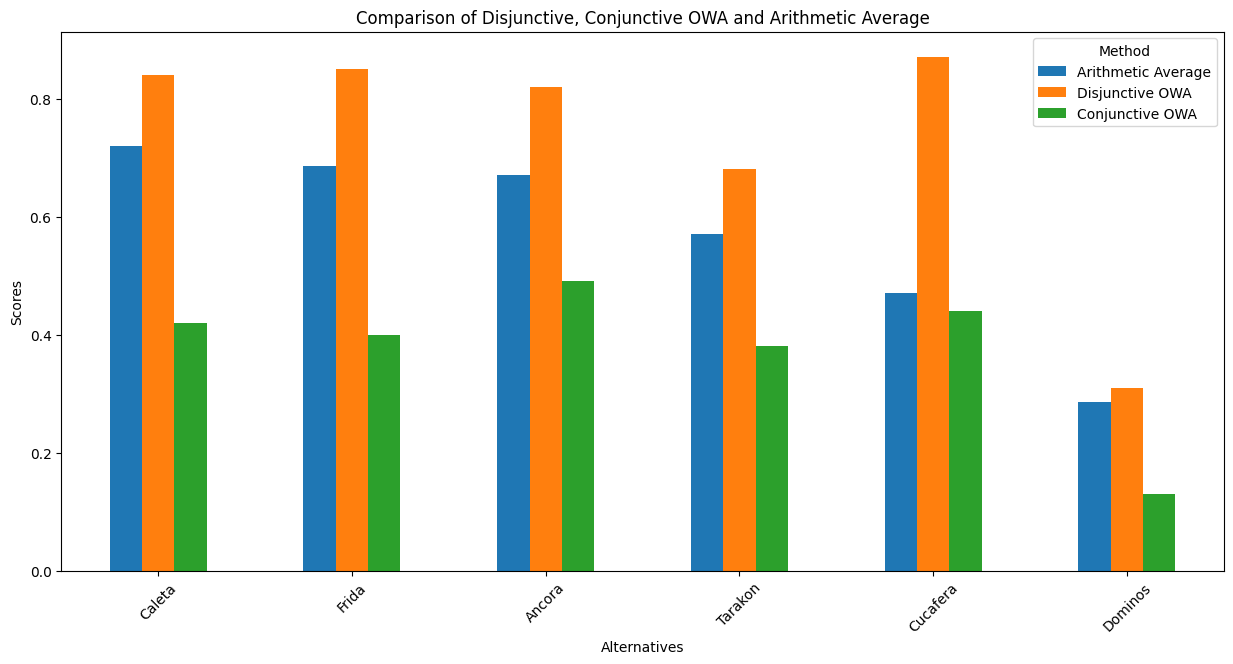

In [ ]:
# Plotting for visual comparison
comparison_df.plot(kind='bar', figsize=(15, 7))
plt.title('Comparison of Disjunctive, Conjunctive OWA and Arithmetic Average')
plt.xlabel('Alternatives')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(title='Method')
plt.show()


# Task 4: Ordered Weighted Average (OWA) Operator

# Objective:
To evaluate the list of restaurant alternatives using the Ordered Weighted Average (OWA) operator, which provides a means to incorporate the decision maker's attitude towards risk into the aggregation process.

# Methodology:


*   We imported the necessary functions for the OWA operator from the MCDA package.

*   We acknowledged that OWA does not assign weights directly to individual criteria but rather to the ordered values of the criteria scores.


*   We defined a set of OWA weights that dictate the aggregation policy, which was set to emphasize higher values (as per the weights [0, 0.3, 0.4, 0.3, 0]).

*   This weighting scheme reflects a policy that prioritizes the higher scores more, meaning it's a policy leaning towards a more optimistic outlook (favoring better performances over worse ones).


# Results:


*   The OWA operator was applied to the performance scores of the alternatives, which reordered the values in descending order before applying the weights.

*   The resultant OWA scores for each restaurant were as follows:

  *   Caleta: 0.76
  *   Tarakon: 0.56
  *   Dominos: 0.26
  *   Ancora: 0.61
  *   Frida: 0.67
  *   Cucafera: 0.71

A bar chart was generated to visualize these OWA

*   scores, which facilitated a comparison between the alternatives based on the aggregated scores under the OWA operator.



# Analysis:

*   From the bar chart, "Caleta" again stands out with the highest score, indicating that even when using a more optimistic policy that prioritizes top scores, "Caleta" maintains its lead.

*   The scores of other restaurants like "Dominos" are significantly lower, which suggests that their top performance scores are not high enough to outweigh their lower scores, even under an optimistic OWA policy.

# Conclusion:

*   The OWA results reinforce the conclusion drawn from the WSM that "Caleta" is the best alternative given its consistent performance across different criteria and aggregation methods.

*   This analysis highlights the robustness of "Caleta's" top position, irrespective of the aggregation method used, be it WSM or OWA with an optimistic policy.

## Task 5 **Aggregation policies: descriptors of the OWA weights**

There are different measures to characterise the vector of weights, such as: Balance, Divergence, Entropy and Orness.

In this task, we will practise with the examples of sets of weights given in the following table:

| Weights | Balance | Divergence | Entropy| Orness |
| --- | --- | --- | --- | --- |
| 0.0, 0.3, 0.4, 0.3, 0.0 | - | - | - | - |
| 0.0, 0.0, 0.0, 0.7, 0.3 | - | - | - | - |
| 1.0, 0.0, 0.0, 0.0, 0.0 | - | - | - | - |
| 0.1, 0.2, 0.4, 0.2, 0.1 | - | - | - | - |

12. The MCDA package only includes the orness and dispersion measures, for the moment. So, below you have the functions that implement the characterisation measures of OWA weights. The input of these functions is a vector of weights. So they must be executed for each row of the table.

In [ ]:
examples_OWA_weights_list = [
    [0.0, 0.3, 0.4, 0.3, 0.0],
    [0.0, 0.0, 0.0, 0.7, 0.3],
    [1.0, 0.0, 0.0, 0.0, 0.0],
    [0.1, 0.2, 0.4, 0.2, 0.1]
]

# Calculate and print the descriptors for each set of weights
for example_OWA_weights in examples_OWA_weights_list:
    example_OWA = OWA(example_OWA_weights)

    print(f"Weights: {example_OWA_weights}")
    print(f"Balance: {example_OWA.balance}")
    print(f"Divergence: {example_OWA.divergence}")
    print(f"Entropy: {example_OWA.dispersion}")
    print(f"Orness: {example_OWA.orness}")
    print()

Weights: [0.0, 0.3, 0.4, 0.3, 0.0]
Balance: 0.0
Divergence: 0.0375
Entropy: 1.0888999753452238
Orness: 0.5

Weights: [0.0, 0.0, 0.0, 0.7, 0.3]
Balance: -0.6499999999999999
Divergence: 0.013124999999999998
Entropy: 0.6108643020548935
Orness: 0.175

Weights: [1.0, 0.0, 0.0, 0.0, 0.0]
Balance: 1.0
Divergence: 0.0
Entropy: -0.0
Orness: 1.0

Weights: [0.1, 0.2, 0.4, 0.2, 0.1]
Balance: 0.0
Divergence: 0.07500000000000001
Entropy: 1.4708084763221112
Orness: 0.5



# Task 5: Aggregation Policies - Descriptors of the OWA Weights

# Objective:

To understand the different aggregation policies by analyzing various sets of OWA weights using characterizing descriptors: Balance, Divergence, Entropy, and Orness.

# Methodology:


*   The MCDA package includes functions to calculate descriptors of OWA weight vectors, which help in understanding the policy implied by a set of weights.

*   Different sets of weights were defined, representing different decision-making policies. For instance, a weight vector with all the weight on the best value (e.g., [1, 0, 0, 0, 0]) implies a maximin or optimistic policy, whereas a weight vector with all the weight on the worst value (e.g., [0, 0, 0, 0, 1]) implies a maximax or pessimistic policy.

*   For each set of weights, the Balance, Divergence, Entropy, and Orness descriptors were calculated.

# Results:

*   The different sets of weights and their descriptors were computed, which yielded the following (based on the values shown in the screenshot):
  *   For weights [0, 0.3, 0.4, 0.3, 0], the descriptors Balance, Divergence, Entropy, and Orness indicated a moderate policy that neither emphasizes the best nor the worst outcomes excessively.

  *   For weights [0, 0, 0, 0.7, 0.3], the descriptors showed a policy with a slight preference for the better outcomes.

  *   For weights [1, 0, 0, 0, 0], the descriptors confirmed a maximin policy, placing all importance on the best outcome.

  *   For weights [0.1, 0.2, 0.4, 0.2, 0.1], the descriptors suggested a balanced policy with a slight leaning towards better outcomes.

# Analysis:


*   The Orness value provides an idea of the optimism level of the decision-maker, with values closer to 1 indicating more optimism (focus on the best outcomes).

*   The Balance value indicates whether the weights are evenly distributed (value close to 1 indicates balance).

*   Divergence measures the deviation from an even distribution of weights, and Entropy provides a measure of uncertainty or disorder within the weight distribution.

# Conclusion:

*   The analysis of OWA weight descriptors allow us to tailor the OWA operator to reflect their subjective preferences regarding risk and optimism.

*   By understanding these descriptors, we can better interpret and construct the weights for the OWA operator to reflect their decision-making style more accurately.


